In [1]:
import sys
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

def add_path(newPath:str) -> str:
    """
    Adds newPath to the existing sys path, if needed.
    :param newPath: gets added temporarily to the PYTHONPATH.
    :return: updated string
    """
    if newPath in sys.path:
        logger.warning(f'path: {newPath} is already on sys.path. (No action taken.)')
        return sys.path
    else:
        logger.debug(f'Adding new path: {newPath} to sys.path.')
        sys.path.append(newPath)
    return sys.path

add_path(r'C:\Users\Owner\PycharmProjects\Utilities')

DEBUG:__main__:Adding new path: C:\Users\Owner\PycharmProjects\Utilities to sys.path.


['C:\\Users\\Owner\\PycharmProjects\\DataScience',
 'C:\\Users\\Owner\\Anaconda3\\python37.zip',
 'C:\\Users\\Owner\\Anaconda3\\DLLs',
 'C:\\Users\\Owner\\Anaconda3\\lib',
 'C:\\Users\\Owner\\Anaconda3',
 '',
 'C:\\Users\\Owner\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Owner\\.ipython',
 'C:\\Users\\Owner\\PycharmProjects\\Utilities']

# Step 1. Read in data

In [2]:
from PandasUtil import PandasUtil
pu = PandasUtil()
fn = r'C:\Users\Owner\Documents\Udemy\ML-Classification-Package\ML Classification Package\3. Logisitic Regression\Train_Titanic.csv'
df = pu.read_df_from_csv(csv_file_name=fn, header=0)
df.tail(10)

DEBUG:matplotlib:$HOME=C:\Users\Owner
DEBUG:matplotlib:CONFIGDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importl

DEBUG:matplotlib:CACHEDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Owner\.matplotlib\fontlist-v300.json


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Step 2. Explore and Visualize data

In [3]:
import pandas as pd
import numpy as np


pu.get_rowCount_colCount(df)
df_surv = pu.select(df=df, column_name='Survived', match_me=1)
survived_cnt = len(df_surv)
df_died = pu.select(df=df, column_name='Survived', match_me=0)
died_cnt = len(df_died)
print (f'Survived count: {survived_cnt}. Died count: {died_cnt}')
print (f'Only {survived_cnt/len(df) * 100 : .2f} % survived')

DEBUG:PandasUtil:df has 891 rows and 12 columns.


Survived count: 342. Died count: 549
Only  38.38 % survived


In [4]:
from PlotUtil import PlotUtil
from matplotlib import pyplot as plt

pl = PlotUtil(plt)
pl.count_plot(df, 'Pclass', hue='Survived')

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


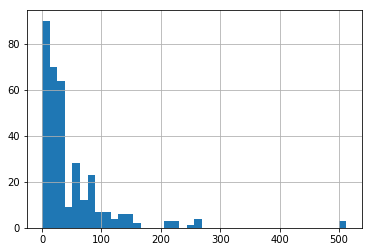

In [5]:
pl.historgram_plot(df=df_surv, xlabel='Fare', bins=40, return_function_do_not_plot=False)

# Step 3. Clean the data

In [6]:
pu.drop_col(df=df, columns=['Name', 'Ticket', 'Embarked', 'Cabin', 'PassengerId'], is_in_place=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


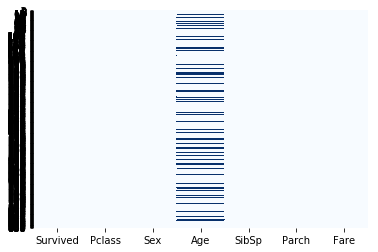

In [7]:
pl.null_heatmap(df)

## find the average ages by sex

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


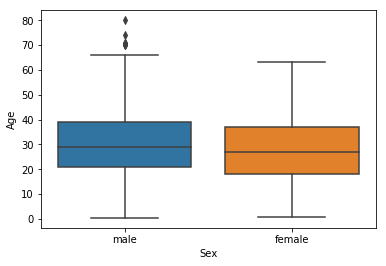

In [8]:
pl.boxplot(df, xlabel='Sex', ylabel='Age')


In [9]:
aggregate_df = pu.aggregates(df, group_by=['Sex'], col='Age' )
aggregate_df.head()
female_row = aggregate_df.loc[aggregate_df['Sex'] == 'female']
f_mean = female_row['mean'].iloc[0]
male_row = aggregate_df.loc[aggregate_df['Sex'] == 'male']
logger.debug(f'male row is: {male_row} and of type {type(male_row)}.')
m_mean = male_row['mean'].iloc[0]
logger.debug(f'male mean is: {m_mean} and of type {type(m_mean)}.')
logger.debug(f'male and female means are {m_mean} and {f_mean}.')

DEBUG:__main__:male row is:     Sex       mean   min   max       sum
1  male  30.726645  0.42  80.0  13919.17 and of type <class 'pandas.core.frame.DataFrame'>.
DEBUG:__main__:male mean is: 30.72664459161148 and of type <class 'numpy.float64'>.
DEBUG:__main__:male and female means are 30.72664459161148 and 27.915708812260537.


In [10]:
logger.debug('Replacing missing female ages.')
mask_missing_age = pu.mark_isnull(df, 'Age')
mask_female = pu.mark_rows_by_criterion(df, 'Sex', 'female')
masks = [mask_female[i] & mask_missing_age[i] for i in range(len(mask_female))]
for i in range(18,22):
    logger.debug(f'{i:3d}: {mask_missing_age[i]} + {mask_female[i]} = {masks[i]}. Age is {df["Age"].iloc[i]}')
pu.replace_col_with_scalar(df, 'Age', f_mean, masks)
logger.debug('replacing nan female age.')
for i in range(18,22):
    logger.debug(f'{i:3d}: {mask_missing_age[i]} + {mask_female[i]} = {masks[i]}. Age is {df["Age"].iloc[i]}')
logger.debug('Replacing missing male ages.')
mask_male = pu.mark_rows_by_criterion(df, 'Sex', 'male')
masks = [mask_male[i] & mask_missing_age[i] for i in range(len(mask_female))]
for i in range(20):
    logger.debug(f'{i:3d}: {mask_missing_age[i]} + {mask_male[i]} = {masks[i]}. Age is {df["Age"].iloc[i]}')
pu.replace_col_with_scalar(df, 'Age', m_mean, masks)
logger.debug('replacing nan male age.')
for i in range(20):
    logger.debug(f'{i:3d}: {mask_missing_age[i]} + {mask_male[i]} = {masks[i]}. Age is {df["Age"].iloc[i]}')


DEBUG:__main__:Replacing missing female ages.
DEBUG:__main__: 18: False + True = False. Age is 31.0
DEBUG:__main__: 19: True + True = True. Age is nan
DEBUG:__main__: 20: False + False = False. Age is 35.0
DEBUG:__main__: 21: False + False = False. Age is 34.0
DEBUG:__main__:replacing nan female age.
DEBUG:__main__: 18: False + True = False. Age is 31.0
DEBUG:__main__: 19: True + True = True. Age is 27.915708812260537
DEBUG:__main__: 20: False + False = False. Age is 35.0
DEBUG:__main__: 21: False + False = False. Age is 34.0
DEBUG:__main__:Replacing missing male ages.
DEBUG:__main__:  0: False + True = False. Age is 22.0
DEBUG:__main__:  1: False + False = False. Age is 38.0
DEBUG:__main__:  2: False + False = False. Age is 26.0
DEBUG:__main__:  3: False + False = False. Age is 35.0
DEBUG:__main__:  4: False + True = False. Age is 35.0
DEBUG:__main__:  5: True + True = True. Age is nan
DEBUG:__main__:  6: False + True = False. Age is 54.0
DEBUG:__main__:  7: False + True = False. Age 

## Now that we've replaced nan ages, take another look at the Age histogram
## Also create a dummy variable for Sex

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


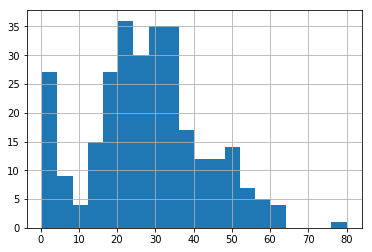

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [11]:
pl.historgram_plot(df=df_surv, xlabel='Age', bins=20, return_function_do_not_plot=False)
col_to_dummy = 'Sex'
dummy_df = pu.dummy_var_df(df, col_to_dummy)
df = pu.replace_col_names(df=dummy_df, replace_dict={'Sex_male': 'male'}, is_in_place=False)
df.head()


## Define X and y

In [12]:
target_col = 'Survived'
X = pu.drop_col(df, target_col, False).values
# X = df.drop(target_col, axis=1).values
logger.debug(f'df without target col: {X}')
y = df[target_col].values
logger.debug(f'target column: {y}')

DEBUG:__main__:df without target col: [[ 3.         22.          1.          0.          7.25        1.        ]
 [ 1.         38.          1.          0.         71.2833      0.        ]
 [ 3.         26.          0.          0.          7.925       0.        ]
 ...
 [ 3.         27.91570881  1.          2.         23.45        0.        ]
 [ 1.         26.          0.          0.         30.          1.        ]
 [ 3.         32.          0.          0.          7.75        1.        ]]
DEBUG:__main__:target column: [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0

## Split into train and test


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001FBEDDD4438>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001FBEDDD4438>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


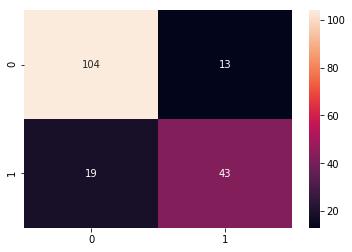

INFO:__main__:              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from DataScienceUtil import DataScienceUtil
dsu = DataScienceUtil()

X_train, X_test, y_train, y_test = dsu.train_test_split(X, y, test_frac=0.2, seed=10)
classifier = dsu.train_model(X_train, y_train, f_classifier=LogisticRegression, seed=0)

y_predict = dsu.model_predict(classifier, X_test)
# y_predict = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict)
pl.heatmap(cm)

report = dsu.classification_report(y_test, y_predict)
logger.info(report)